In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import lifetimes
import os

In [2]:
pip install lifetimes

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv ('Online+Retail.csv')

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34,1.69,13047.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.dtypes 
## InvoiceDate column is object. We should change it to datetime.
##InvoiceNo and StokeCode are object and we should change it to integer.
## We can change CustomerID to integer

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.isnull().sum() 
#### CustomerID has significant amount of null values we cannot remove them as CustomerID is a very important column.


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
round(135080/df.shape[0],3)*100 ## 24.9% null values in the CustomerID column. We should remove all these null values.

24.9

In [9]:
df['CustomerID'].nunique() 

4372

In [10]:
len(df[df.Quantity<0]) ## These are unqualified recors therefore they should be removed.

10624

In [11]:
dfnew = df[(df.Quantity>0) & (df.CustomerID.isnull()==False)]

In [12]:
dfnew.shape

(397924, 8)

In [13]:
dfnew['amt'] = dfnew['Quantity'] * dfnew['UnitPrice'] ### We need to calculate the monetary value.

In [14]:
dfnew['InvoiceDate'] = pd.to_datetime(dfnew['InvoiceDate'])

In [15]:
dfnew.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
amt                   float64
dtype: object

In [16]:
dfnew.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
dfnew.describe() ## STD is the squareroot of the variance.

,Quantity,UnitPrice,CustomerID,amt
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [18]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [19]:
modeldata = summary_data_from_transaction_data (dfnew, 'CustomerID','InvoiceDate', monetary_value_col='amt',observation_period_end='2011-12-9')
modeldata.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64
0.3569946992394561


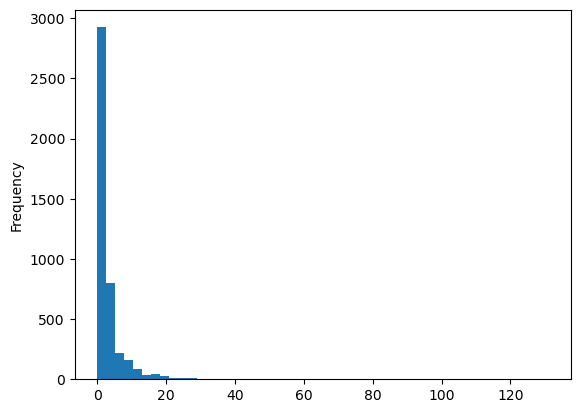

In [20]:
modeldata['frequency'].plot(kind='hist',bins=50)
print(modeldata['frequency'].describe())
print(sum(modeldata['frequency']==0)/float(len(modeldata)))

In [21]:
dfnew[dfnew.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amt
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


## Creating the CLV model 

# Model building.

In [22]:
from lifetimes import BetaGeoFitter

In [23]:
bgf = BetaGeoFitter(penalizer_coef = 0.0) 
# We use the penalizer_coef to avoid overfitting. We put zero if the dataset is large. 
# We use it to have not exagereted likelihood function.

In [24]:
bgf.fit(modeldata['frequency'],modeldata['recency'],modeldata['T'])
print (bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>


In [25]:
# T is the customer age from the first purchase until now.

# Creating frequency-recency matrix.

In [26]:
from lifetimes.plotting import plot_frequency_recency_matrix

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

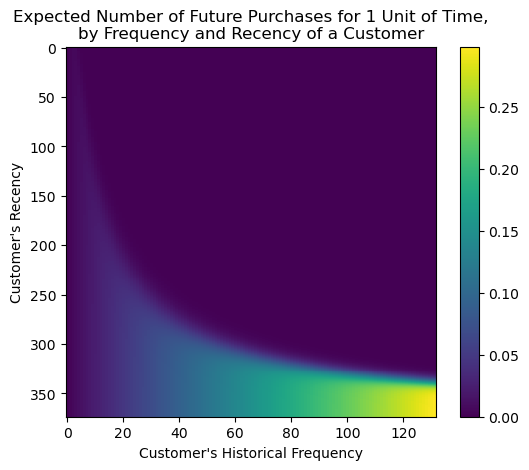

In [27]:
plot_frequency_recency_matrix (bgf)

We can see in the above graph that the customers with higher recency and higher frequency  have higher probability of buying products in the next 1 day(It means they are more valuable). It also shows us that having only one factor could mislead us but having two factors giving more information.

# Creating probability alive matrix.

In [28]:
from lifetimes.plotting import plot_probability_alive_matrix

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

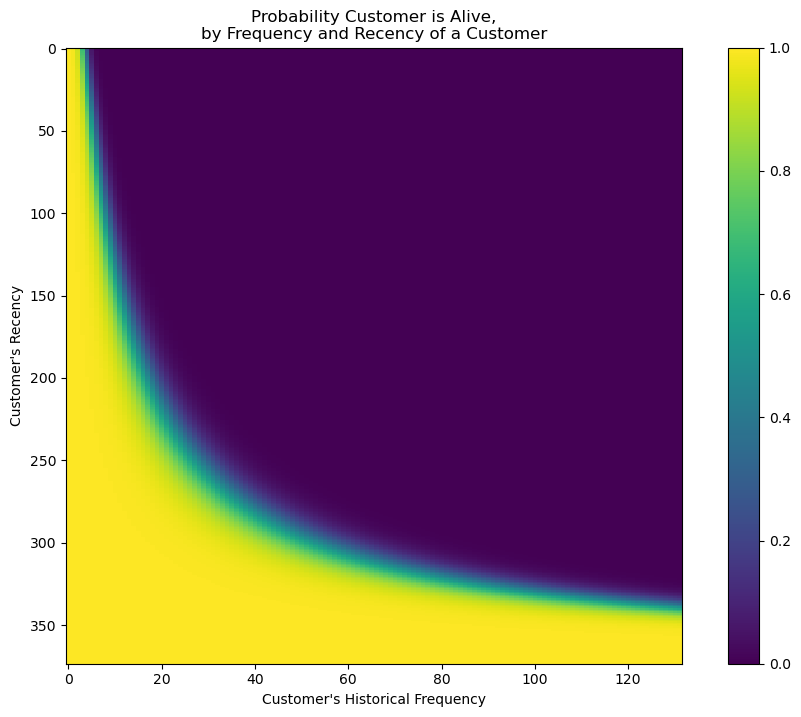

In [29]:
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

The difference between recency-frequency matrix and probability alive matrix is recency-frequency show us the probability of a customer buying product in the future but probability alive matrix shows us wther the customer is gonna be active or not. Above we can see that the receny reduce , the frequency also reduces. Recency increases the frequency is also increases. Probability of being alive is also increasing.

# Predict future transaction number.

In [30]:
t = 1 # T is the given day.We can here specify how many day we are gonna predict. 30 means 1 month.1 means 1 day.
modeldata['predicted purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t,modeldata['recency'],modeldata['frequency'],modeldata['T'])
modeldata.sort_values(by='predicted purchases').tail(5)

,frequency,recency,T,monetary_value,predicted purchases
CustomerID,,,,,
17502.0,3.0,20.0,29.0,154.166667,0.196471
14788.0,1.0,19.0,26.0,310.990000,0.197156
14904.0,1.0,23.0,25.0,628.480000,0.223423
17835.0,2.0,21.0,23.0,120.400000,0.229032
12950.0,2.0,22.0,24.0,765.700000,0.231974


In [31]:
modeldata.sort_values(by='predicted purchases').head(5)

,frequency,recency,T,monetary_value,predicted purchases
CustomerID,,,,,
15525.0,2.0,371.0,373.0,255.995000,2.911720e-291
14594.0,1.0,366.0,373.0,124.830000,1.454864e-289
16539.0,3.0,371.0,373.0,315.486667,5.322761e-289
14865.0,1.0,365.0,372.0,15.000000,2.100351e-288
13255.0,1.0,364.0,373.0,173.810000,5.753029e-288


The tail five gives us top five customers with highest purchase power.

# Create period transaction plot.

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

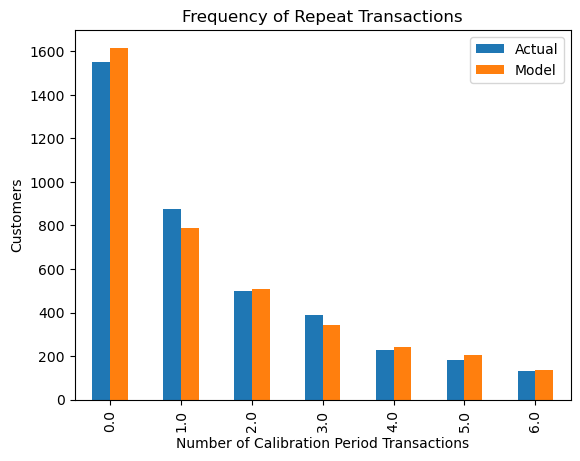

In [32]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf) ## Calibration means machine learnings training period.

# Performance tracking with calibration_purchases_holdout_purchases plot

In [33]:
summary_cal_holdout = calibration_and_holdout_data(df,'CustomerID','InvoiceDate',
                                                  calibration_period_end= '2011-06-08',
                                                  observation_period_end= '2011-12-9')

In [34]:
print(summary_cal_holdout.head())

            frequency_cal  recency_cal  T_cal  frequency_holdout  \
CustomerID                                                         
12346.0               0.0          0.0  141.0                0.0   
12347.0               2.0        121.0  183.0                4.0   
12348.0               2.0        110.0  174.0                1.0   
12350.0               0.0          0.0  126.0                0.0   
12352.0               3.0         34.0  112.0                3.0   

            duration_holdout  
CustomerID                    
12346.0                184.0  
12347.0                184.0  
12348.0                184.0  
12350.0                184.0  
12352.0                184.0  


In [35]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf.fit(summary_cal_holdout['frequency_cal'],summary_cal_holdout['recency_cal'],summary_cal_holdout['T_cal'])

<lifetimes.BetaGeoFitter: fitted with 2821 subjects, a: 0.03, alpha: 49.18, b: 0.41, r: 0.78>

C:\Users\oktay\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

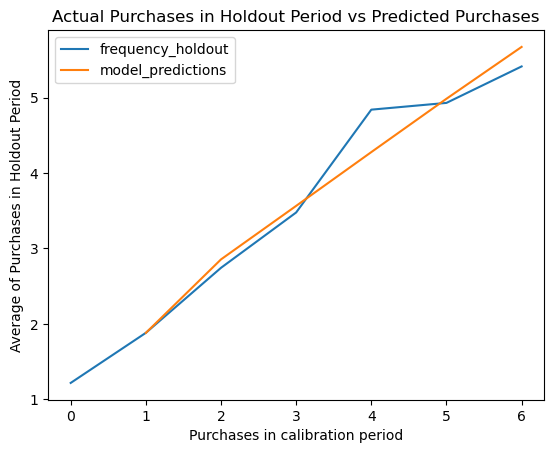

In [36]:
plot_calibration_purchases_vs_holdout_purchases(bgf,summary_cal_holdout)

# Plot the historical probability of survival based on CLV model.

With the CLV model we created , we can specifically estimate a customer's historical probability of being alive.

In [37]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

In [38]:
id = 14606
days_since_birth = 365
sp_trans=df.loc[df['CustomerID']==id]
print(sp_trans)

       InvoiceNo StockCode                          Description  Quantity  \
2421      536591     21427             SKULLS STORAGE BOX SMALL         1   
2422      536591     22135                LADLE LOVE HEART PINK         1   
2423      536591    90214M            LETTER "M" BLING KEY RING         1   
2424      536591    90214V            LETTER "V" BLING KEY RING         1   
2425      536591    90214S            LETTER "S" BLING KEY RING         1   
...          ...       ...                                  ...       ...   
540171    581469     21485     RETROSPOT HEART HOT WATER BOTTLE         1   
540172    581469     22165  DIAMANTE HEART SHAPED WALL MIRROR,          1   
540173    581469     21986     PACK OF 12 PINK POLKADOT TISSUES         1   
540174    581469     22087             PAPER BUNTING WHITE LACE         6   
540175    581469     22320          BIRDS MOBILE VINTAGE DESIGN         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
2421    2

ConversionError: Failed to convert value(s) to axis units: '2010-12-01 16:57'

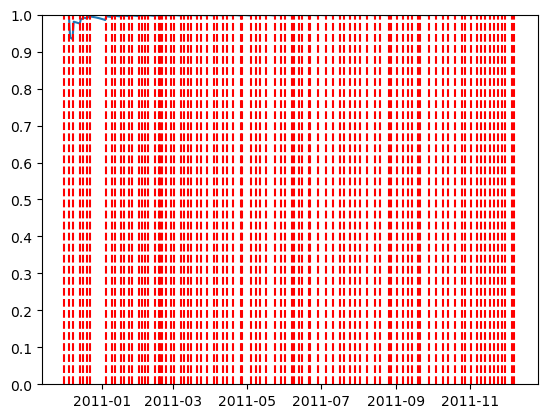

In [39]:
#fig = plt.figure(figsize=(12,8))
plot_history_alive(bgf,days_since_birth,sp_trans,'InvoiceDate')

# Subset the customers with purchase behaviour

In [40]:
returning_customers_summary = modeldata[modeldata['frequency']>0] # TO find the customers with repeat purchase.

In [41]:
print(returning_customers_summary.head())

            frequency  recency      T  monetary_value  predicted purchases
CustomerID                                                                
12347.0           6.0    365.0  367.0      599.701667        1.309821e-275
12348.0           3.0    283.0  358.0      301.480000        1.464576e-215
12352.0           6.0    260.0  296.0      368.256667        2.302979e-175
12356.0           2.0    303.0  325.0      269.905000        3.581836e-222
12358.0           1.0    149.0  150.0      683.200000         1.595659e-70


In [42]:
returning_customers_summary

,frequency,recency,T,monetary_value,predicted purchases
CustomerID,,,,,
12347.0,6.0,365.0,367.0,599.701667,1.309821e-275
12348.0,3.0,283.0,358.0,301.480000,1.464576e-215
12352.0,6.0,260.0,296.0,368.256667,2.302979e-175
12356.0,2.0,303.0,325.0,269.905000,3.581836e-222
12358.0,1.0,149.0,150.0,683.200000,1.595659e-70
...,...,...,...,...,...
18272.0,5.0,244.0,246.0,487.752000,4.129384e-150
18273.0,2.0,255.0,257.0,76.500000,1.965985e-165
18282.0,1.0,119.0,126.0,77.840000,9.562689e-50


# Gamma-Gamma modelling.

The Gamma-Gamma model is used to predict the monetary value of user's transactions. In other words , if we know the price and historical transactions of a specific customer , then we can apply Gamma-Gamma model to predict most likely monetary value per transaction in the future.

The model will determine the lifetime value of a customer


LTV = expected number of transactions * revenue per transaction * margin

Where the first element is from BG/NBD model , the second element is from Gamma-Gamma model and the margin is defined by the business

In [43]:
from lifetimes import GammaGammaFitter

In [44]:
ggf =GammaGammaFitter(penalizer_coef=0)

In [45]:
ggf.fit(returning_customers_summary['frequency'],
       returning_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>

In [46]:
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [47]:
print(ggf.conditional_expected_average_profit(modeldata['frequency'],modeldata['monetary_value']).head(10))

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
12352.0    376.166864
12353.0    416.917667
12354.0    416.917667
12355.0    416.917667
12356.0    324.008941
dtype: float64


# MACHINE LEARNING ALGORITHMS

In [48]:
import datetime

In [49]:
list(dfnew.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'amt']

In [50]:
dfnew_train = dfnew[dfnew.InvoiceDate < pd.to_datetime(datetime.date(2011,11,9))]
dfnew_test = dfnew[dfnew.InvoiceDate >= pd.to_datetime(datetime.date(2011,11,9))]

In [51]:
maxdate = dfnew_train.InvoiceDate.max()
mindate= dfnew_train.InvoiceDate.min()
print(maxdate)
print(mindate)

2011-11-08 17:42:00
2010-12-01 08:26:00


In [52]:
dfnew_train['duration'] = (maxdate-dfnew_train.InvoiceDate)/np.timedelta64(1,'D')

- Get time duration between the last transaction and now.

In [53]:
dfsum1 = dfnew_train.groupby(['CustomerID'])['duration'].min().reset_index()

In [54]:
dfsum1.rename(columns = {'duration':'latetime'},inplace=True)

- Get time duration between the first transaction and now.

In [55]:
dfsum2 = dfnew_train.groupby(['CustomerID'])['duration'].max().reset_index()
dfsum2.rename(columns = {'duration':'earlytime'},inplace=True)

- Get transaction frequency (whole history)

In [56]:
dfnew_train['freq']=1

In [57]:
dfsum3 = dfnew_train.groupby(['CustomerID'])['freq'].sum().reset_index()

- Get transaction frequency (recent 3 months history)

In [58]:
dfnew_train['freq_3m'] =1
dfsum4 = dfnew_train[dfnew_train.duration<91].groupby(['CustomerID'])['freq_3m'].sum().reset_index()

In [59]:
dfsum = pd.merge(dfsum1 , dfsum2, on=['CustomerID'], how = 'outer')
dfsum = pd.merge(dfsum , dfsum3, on=['CustomerID'], how = 'outer')
dfsum = pd.merge(dfsum , dfsum4, on=['CustomerID'], how = 'outer')


In [60]:
dfsum.head()

,CustomerID,latetime,earlytime,freq,freq_3m
0,12346.0,294.320139,294.320139,1,NaN
1,12347.0,8.220139,336.114583,171,47.0
2,12348.0,44.186806,326.939583,31,3.0
3,12350.0,279.070139,279.070139,17,NaN
4,12352.0,5.128472,265.214583,85,47.0


- Get other data source

In [61]:
dfnew.InvoiceDate.max()
dfnew.InvoiceDate.min()
A = dfnew[dfnew.InvoiceDate>pd.to_datetime(datetime.date(2011, 11, 9))]
A.shape
Z = pd.DataFrame(A.CustomerID.value_counts()).reset_index()
list(Z.columns)
Z.columns = ['CustomerID','buytime']
Z = Z.sort_values(['buytime'], ascending = False)
Z.head(20)

len(Z)
len(set(dfnew.CustomerID))

allcus = pd.DataFrame(set(dfnew.CustomerID), columns = ['CustomerID'])

allcus = pd.merge(allcus, Z, on=['CustomerID'], how='left').sort_values(['buytime'], ascending = False)
allcus = allcus.fillna(0)

allcus['buytime'] = allcus['buytime']/allcus['buytime'].max()

allcus['v1'] = allcus['buytime']*0.78 + np.random.normal(0, 0.11, len(allcus))

allcus['v2'] = allcus['buytime']*allcus['buytime']*(-0.195) + 0.11*allcus['buytime']

allcus.corr()


allcus['v1'] = (allcus['v1'] - allcus['v1'].min())/(allcus['v1'].max() - allcus['v1'].min())

allcus['v2'] = (allcus['v2'] - allcus['v2'].min())/(allcus['v2'].max() - allcus['v2'].min())

allcus['score'] = round(allcus['v2']*100000)
allcus.score.max()


allcus['discount'] = round(allcus['v1']*12.6)

allcus['r'] = np.random.randint(100,size=len(allcus))

def def2(D):
    if D['r']<13:
        x = 0
    else:
        x = D['discount']
    
    return x

allcus['discount'] = allcus.apply(def2, axis = 1)

v = ['CustomerID', 'score', 'discount']
allcus = allcus[v]

allcus = allcus.sort_values(['score'])

allcus.score.std()
allcus.corr()

allcus.to_csv('oth.csv', index = False)

In [62]:
other_data = pd.read_csv('oth.csv')
list(other_data.columns)

['CustomerID', 'score', 'discount']

In [63]:
dfsum = pd.merge(dfsum,other_data, on=['CustomerID'], how='left')

- Get target

In [64]:
dfnew_test['target'] = 1
dfsum_target = dfnew_test.groupby(['CustomerID'])['target'].sum().reset_index()

In [65]:
dfsum = pd.merge(dfsum,dfsum_target,on=['CustomerID'], how='left')


,CustomerID,latetime,earlytime,freq,freq_3m,score,discount,target
1216,14096.0,8.147917,70.286806,2688,2688.0,0.0,13.0,2423.0
300,12748.0,0.138889,342.204167,2945,1070.0,70118.0,11.0,1651.0
3766,17841.0,0.197222,342.125694,6309,2548.0,77026.0,11.0,1538.0
1770,14911.0,1.018750,342.150694,4566,2066.0,95394.0,7.0,1111.0
2896,16549.0,0.156250,303.152083,511,368.0,100000.0,4.0,470.0
...,...,...,...,...,...,...,...,...
1690,14782.0,288.270833,288.270833,6,0.0,85858.0,5.0,0.0
1693,14792.0,32.349306,32.349306,2,2.0,85858.0,5.0,0.0
1695,14795.0,135.193056,135.193056,6,0.0,85858.0,5.0,0.0
1697,14798.0,21.280556,279.094444,12,4.0,85858.0,2.0,0.0


In [67]:
dfsum =dfsum.fillna(0).sort_values(['target'],ascending=False)

- Check all features in the modelling data.

In [68]:
list(dfsum.columns)
dfsum.head(10)

,CustomerID,latetime,earlytime,freq,freq_3m,score,discount,target
1216,14096.0,8.147917,70.286806,2688,2688.0,0.0,13.0,2423.0
300,12748.0,0.138889,342.204167,2945,1070.0,70118.0,11.0,1651.0
3766,17841.0,0.197222,342.125694,6309,2548.0,77026.0,11.0,1538.0
1770,14911.0,1.018750,342.150694,4566,2066.0,95394.0,7.0,1111.0
2896,16549.0,0.156250,303.152083,511,368.0,100000.0,4.0,470.0
1572,14606.0,1.134722,342.031250,2364,531.0,97479.0,5.0,336.0
1463,14456.0,9.200694,111.191667,645,404.0,97218.0,8.0,325.0
2772,16360.0,7.204167,57.161111,372,372.0,96335.0,5.0,290.0
2052,15311.0,4.172222,342.334028,2104,535.0,95932.0,4.0,275.0
4065,18283.0,12.127778,306.144444,487,87.0,95766.0,0.0,269.0


In [69]:
dfsum.isna().sum()

CustomerID    0
latetime      0
earlytime     0
freq          0
freq_3m       0
score         0
discount      0
target        0
dtype: int64

# XGB Model